In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
import numpy as np

In [2]:
dataframe = pd.read_csv("pruebasClusterAlojamiento.csv")
dataframe.head()

,Unnamed: 0,ids,name,Hotel,room,number_reviews,price,availability_365,calificacion,cluster
0,0,1,Habitacion1,Hotel 1,Entirehomeapt,0,160,283,1,0
1,1,2,Habitacion2,Hotel 1,Entirehomeapt,65,350,343,4,3
2,2,3,Habitacion3,Hotel 1,Privateroom,1,50,60,5,1
3,3,4,Habitacion4,Hotel 1,Privateroom,0,95,365,3,0
4,4,5,Habitacion5,Hotel 1,Entirehomeapt,0,50,351,5,0


In [3]:
price = dataframe['price'].values
availability_365 = dataframe['availability_365'].values
cal = dataframe['calificacion'].values
ids = dataframe['ids'].values
nom = dataframe['name'].values
hotel = dataframe['hotel'].values
room = dataframe['room'].values
nm = dataframe['number_reviews'].values
price = price.astype(np.int)
availability_365 = availability_365.astype(np.int)

KeyError: 'hotel'

In [4]:
Data = { 'y' : availability_365, 'x' : price, 'z' : cal}
df = DataFrame(Data,columns=['x','y', 'z'])
df

,x,y,z
0,160,283,1
1,350,343,4
2,50,60,5
3,95,365,3
4,50,351,5
...,...,...,...
3706,135,326,3
3707,79,332,2
3708,275,317,2
3709,179,150,4


In [5]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

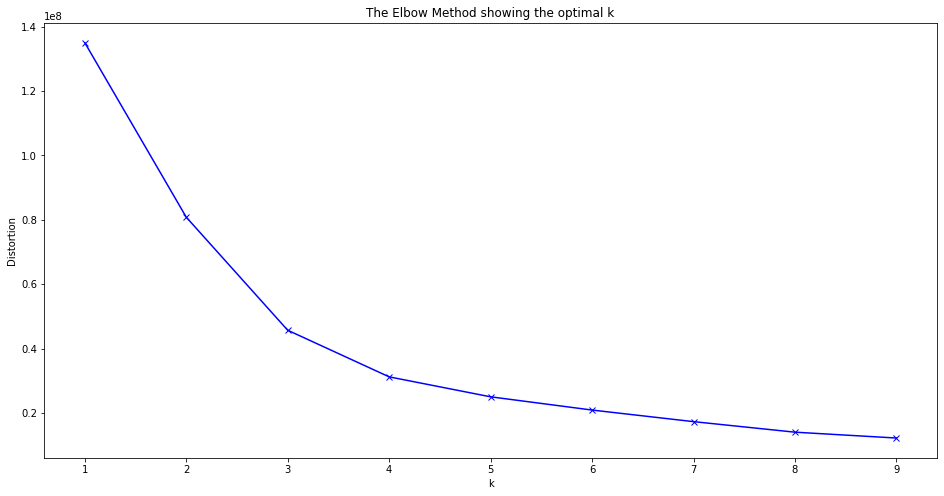

In [6]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
centroids = kmeanModel.cluster_centers_
print(centroids)

[[ 241.63620072  330.84946237    2.49462366]
 [ 122.07446809   70.47135843    2.56301146]
 [1594.42857143  171.14285714    2.64285714]
 [ 565.9380531   202.88495575    2.53097345]
 [ 101.82039911  320.93403548    2.48725055]]


In [9]:
centP = []
centD = []
centC = []
lenc = len(centroids)
xc = 0
while xc < lenc:
    centP.append(centroids[xc][0])
    centD.append(centroids[xc][1])
    centC.append(centroids[xc][2])
    xc +=1

print(centP)
print(centD)
print(centC)

[241.63620071684446, 122.07446808510636, 1594.4285714285713, 565.938053097344, 101.8203991130799]
[330.8494623655908, 70.47135842880849, 171.14285714285714, 202.88495575221236, 320.9340354767188]
[2.494623655913979, 2.5630114566284785, 2.642857142857143, 2.5309734513274336, 2.487250554323726]


In [10]:
centroidData = {'Centroide_Precio': centP, 'Centroide_Disponibilidad': centD, 'Centroide_Calificacion': centC }
centroidDatas = DataFrame(centroidData,columns=['Centroide_Precio',  'Centroide_Disponibilidad', 'Centroide_Calificacion'] )
centroidDatas.to_csv('centroidAlojamiento.csv')

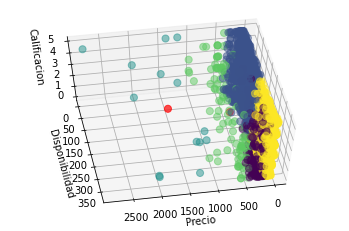

In [11]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection = '3d')
ax.scatter(df['x'], df['y'], df['z'], c= kmeanModel.labels_.astype(float), s=50, alpha=0.5)
ax.set_xlabel('Precio')
ax.set_ylabel('Disponibilidad')
ax.set_zlabel('Calificacion')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], c='red', s=50)
ax.view_init(60, 80)
plt.show()

In [12]:
cluster = kmeanModel.labels_

In [13]:
dataCluster = {'ids': ids, 'name' : nom, 'Hotel' : hotel, 'room': room, 'number_reviews': nm, 'price' : price, 'availability_365' : availability_365,'calificacion' : cal, 'cluster' : cluster }
dfCluster = DataFrame(dataCluster,columns=[ 'ids','name', 'Hotel', 'room','number_reviews', 'price','availability_365','calificacion' ,'cluster'] )
dfCluster

NameError: name 'hotel' is not defined

In [14]:
dfCluster.to_csv('pruebasClusterAlojamiento.csv')

NameError: name 'dfCluster' is not defined